In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# read in the data

df = pd.read_csv('movies.csv')

In [3]:
# let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# is there any missing data?

# create a for loop to loop through each column

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# changing the data types of columns

df = df[~df['votes'].isnull()]
df = df[~df['budget'].isnull()]
df = df[~df['gross'].isnull()]
df = df[~df['runtime'].isnull()]

df[['votes']] = df[['votes']].astype(int)
df[['budget']] = df[['budget']].astype(int)
df[['gross']] = df[['gross']].astype(int)
df[['runtime']] = df[['runtime']].astype(int)

In [7]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.      146  
1                       Columbia Pictures      104  
2                               Lucasfilm      124  
3                      Paramount Pictures       88  
4                          Orion Pictures       98  
...                                   ...      ...  
7648                    Columbia Pictures      124  
7649                   Paramount Pictures       99  
7650                   Universal Pictures      101  
7651                 20th Century Studios      100  
7652  Beijing Diqi Yinxiang Entertainment      149  

[5435 rows x 15 columns]

In [15]:
#order data by the gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [9]:
# makes the dataset scrollable and lets us see all the data

pd.set_option('display.max_rows', None)

In [11]:
# drop any duplicates and shows distinct values

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

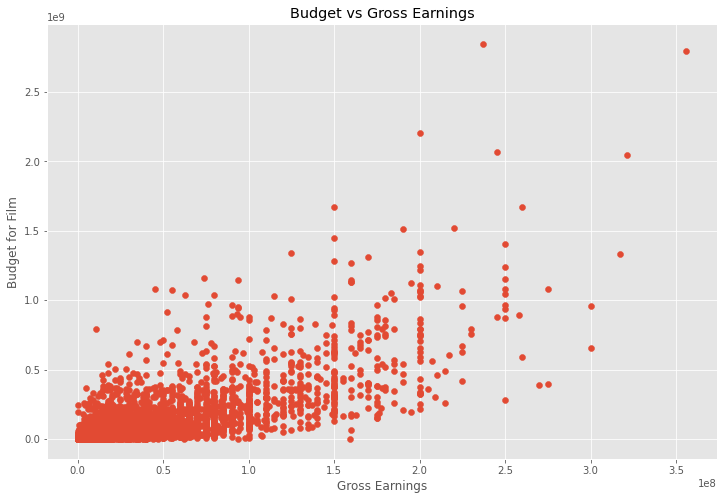

In [13]:
# build scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [16]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox      162  
7445  2797501328         Marvel Studios      181  
3045  2201647264  Twentieth Century Fox      194  
6663  2069521700              Lucasfilm      138  
7244  2048359754         Marvel Studios      149

<AxesSubplot:xlabel='budget', ylabel='gross'>

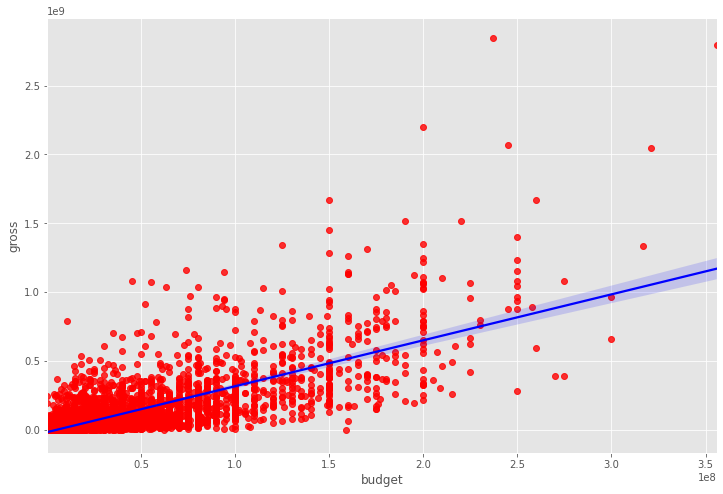

In [19]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

blue line that shows correlation. 
line is going up and showing a positive correlation. 
budget and gross are correlated

In [25]:
# let's start looking at correlation

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.055391  0.205852  0.327793  0.274354  0.074203
score    0.055391  1.000000  0.473789  0.071821  0.222100  0.414580
votes    0.205852  0.473789  1.000000  0.440035  0.614895  0.352437
budget   0.327793  0.071821  0.440035  1.000000  0.740410  0.318595
gross    0.274354  0.222100  0.614895  0.740410  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

there's different types of correlation
default is pearson
then there's kendall and spearman

there's high correlation between budget and gross

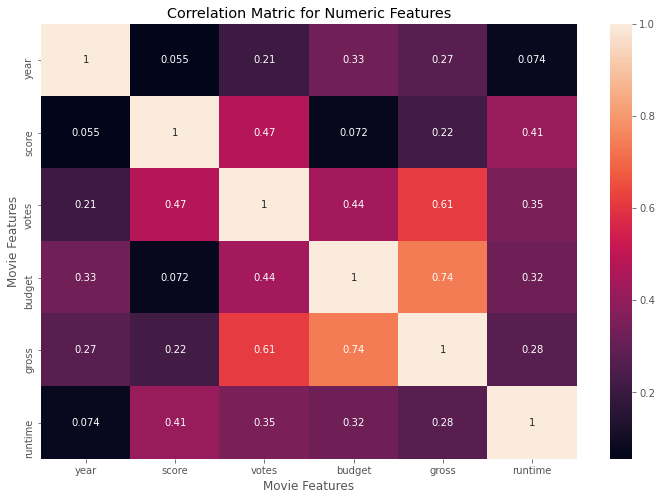

In [27]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

black = lower correlation;
lighter colour = higher correlation

In [28]:
# take a look at the company column

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox      162  
7445  2797501328         Marvel Studios      181  
3045  2201647264  Twentieth Century Fox      194  
6663  2069521700              Lucasfilm      138  
7244  2048359754         Marvel Studios      149

In [32]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name     rating  genre  \
5445                                             Avatar      PG-13      0   
7445                                  Avengers: Endgame      PG-13      0   
3045                                            Titanic      PG-13      6   
6663         Star Wars: Episode VII - The Force Awakens      PG-13      0   
7244                             Avengers: Infinity War      PG-13      0   
7480                                      The Lion King         PG      2   
6653                                     Jurassic World      PG-13      0   
6043                                       The Avengers      PG-13      0   
6646                                          Furious 7      PG-13      0   
7494                                          Frozen II         PG      2   
6644                            Avengers: Age of Ultron      PG-13      0   
7247                                      Black Panther      PG-13      0   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13      1   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13      0   
7271                     Jurassic World: Fallen Kingdom      PG-13      0   
6262                                             Frozen         PG      2   
7072                               Beauty and the Beast         PG      7   
7281                                      Incredibles 2         PG      2   
7055                            The Fate of the Furious      PG-13      0   
6244                                         Iron Man 3      PG-13      0   
6688                                            Minions         PG      2   
6846                         Captain America: Civil War      PG-13      0   
7250                                            Aquaman      PG-13      0   
4245      The Lord of the Rings: The Return of the King      PG-13      0   
7458                          Spider-Man: Far from Home      PG-13      0   
7456                                     Captain Marvel      PG-13      0   
5878                     Transformers: Dark of the Moon      PG-13      0   
6059                                            Skyfall      PG-13      0   
6494                    Transformers: Age of Extinction      PG-13      0   
2448                                      The Lion King          G      2   
6047                              The Dark Knight Rises      PG-13      0   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13      0   
7450                                              Joker          R      5   
7488                                        Toy Story 4          G      2   
5685                                        Toy Story 3          G      2   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13      0   
6869                       Rogue One: A Star Wars Story      PG-13      0   
7481                                            Aladdin         PG      1   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13      0   
7140                                    Despicable Me 3         PG      2   
2245                                      Jurassic Park      PG-13      0   
6908                                       Finding Dory         PG      2   
3451          Star Wars: Episode I - The Phantom Menace         PG      0   
5667                                Alice in Wonderland         PG      1   
6863                                           Zootopia         PG      2   
6045                  The Hobbit: An Unexpected Journey      PG-13      1   
3843              Harry Potter and the Sorcerer's Stone         PG      1   
5243                                    The Dark Knight      PG-13      0   
6311                                    Despicable Me 2         PG      2   
6905                                    The Jungle Book         PG      1   
7051                     Jumanji: Welcome to the Jungle      PG-13      0   
6455          The Hobbit: The Battle of the Fiv

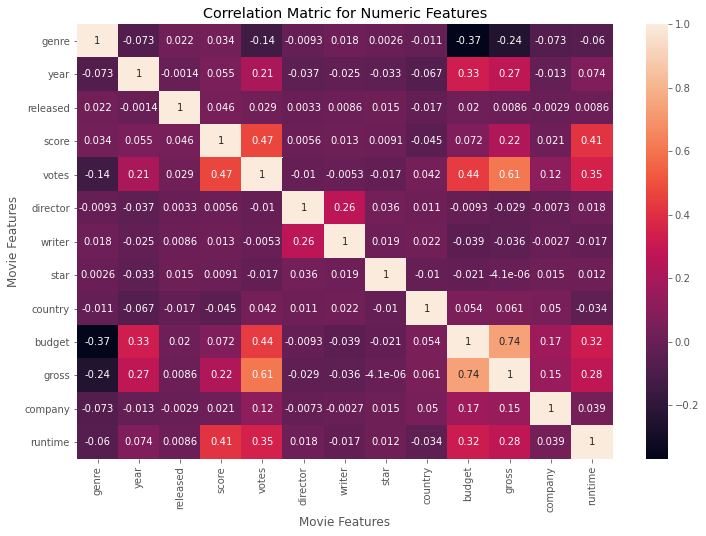

In [33]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [34]:
df_numerized.corr()

genre      year  released     score     votes  director  \
genre     1.000000 -0.072815  0.021617  0.033805 -0.136573 -0.009300   
year     -0.072815  1.000000 -0.001405  0.055391  0.205852 -0.036942   
released  0.021617 -0.001405  1.000000  0.046343  0.028998  0.003342   
score     0.033805  0.055391  0.046343  1.000000  0.473789  0.005577   
votes    -0.136573  0.205852  0.028998  0.473789  1.000000 -0.010196   
director -0.009300 -0.036942  0.003342  0.005577 -0.010196  1.000000   
writer    0.017790 -0.024794  0.008619  0.013130 -0.005301  0.262973   
star      0.002638 -0.032788  0.015370  0.009139 -0.017134  0.036289   
country  -0.010768 -0.066730 -0.017204 -0.044624  0.042173  0.011107   
budget   -0.368932  0.327793  0.019896  0.071821  0.440035 -0.009341   
gross    -0.244499  0.274354  0.008587  0.222100  0.614895 -0.029365   
company  -0.073306 -0.013061 -0.002928  0.021055  0.119367 -0.007337   
runtime  -0.060186  0.074203  0.008619  0.414580  0.352437  0.018082   

            writer      star   country    budget     gross   company   runtime  
genre     0.017790  0.002638 -0.010768 -0.368932 -0.244499 -0.073306 -0.060186  
year     -0.024794 -0.032788 -0.066730  0.327793  0.274354 -0.013061  0.074203  
released  0.008619  0.015370 -0.017204  0.019896  0.008587 -0.002928  0.008619  
score     0.013130  0.009139 -0.044624  0.071821  0.222100  0.021055  0.414580  
votes    -0.005301 -0.017134  0.042173  0.440035  0.614895  0.119367  0.352437  
director  0.262973  0.036289  0.011107 -0.009341 -0.029365 -0.007337  0.018082  
writer    1.000000  0.019255  0.022076 -0.039448 -0.035920 -0.002652 -0.016671  
star      0.019255  1.000000 -0.010140 -0.021283 -0.000004  0.015087  0.012439  
country   0.022076 -0.010140  1.000000  0.054366  0.060952  0.049560 -0.033554  
budget   -0.039448 -0.021283  0.054366  1.000000  0.740410  0.171385  0.318595  
gross    -0.035920 -0.000004  0.060952  0.740410  1.000000  0.150234  0.275596  
company  -0.002652  0.015087  0.049560  0.171385  0.150234  1.000000  0.038752  
runtime  -0.016671  0.012439 -0.033554  0.318595  0.275596  0.038752  1.000000

In [35]:
# unstacking helps to see the ones that have the highest correlation first

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

genre     genre       1.000000
          year       -0.072815
          released    0.021617
          score       0.033805
          votes      -0.136573
          director   -0.009300
          writer      0.017790
          star        0.002638
          country    -0.010768
          budget     -0.368932
          gross      -0.244499
          company    -0.073306
          runtime    -0.060186
year      genre      -0.072815
          year        1.000000
          released   -0.001405
          score       0.055391
          votes       0.205852
          director   -0.036942
          writer     -0.024794
          star       -0.032788
          country    -0.066730
          budget      0.327793
          gross       0.274354
          company    -0.013061
          runtime     0.074203
released  genre       0.021617
          year       -0.001405
          released    1.000000
          score       0.046343
          votes       0.028998
          director    0.003342
        

In [36]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368932
genre     budget     -0.368932
gross     genre      -0.244499
genre     gross      -0.244499
votes     genre      -0.136573
genre     votes      -0.136573
company   genre      -0.073306
genre     company    -0.073306
          year       -0.072815
year      genre      -0.072815
country   year       -0.066730
year      country    -0.066730
runtime   genre      -0.060186
genre     runtime    -0.060186
score     country    -0.044624
country   score      -0.044624
budget    writer     -0.039448
writer    budget     -0.039448
year      director   -0.036942
director  year       -0.036942
writer    gross      -0.035920
gross     writer     -0.035920
country   runtime    -0.033554
runtime   country    -0.033554
year      star       -0.032788
star      year       -0.032788
gross     director   -0.029365
director  gross      -0.029365
writer    year       -0.024794
year      writer     -0.024794
star      budget     -0.021283
budget    star       -0.021283
country 

In [37]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.614895
votes     gross       0.614895
budget    gross       0.740410
gross     budget      0.740410
genre     genre       1.000000
writer    writer      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# gross and budget has the highest correlation

# company has low correlation